## GARCH Volatility Model

This analysis demonstrated how GARCH and its variations are effective for modeling and forecasting volatility in financial markets. By fitting multiple GARCH models to SPY log returns, I identified key patterns in volatility dynamics. Simulating volatility paths provided additional insights into how these models respond to market conditions, emphasizing their practical utility for risk management and financial decision-making.

---


1. #### Introduction to GARCH:

    The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a widely used statistical tool for modeling and forecasting financial market volatility. It extends the ARCH model by incorporating lagged conditional variances, which allows it to capture volatility clustering—a phenomenon where high-volatility periods tend to be followed by more high volatility and low-volatility periods tend to follow low volatility.

    Variations of GARCH, such as TGARCH (Threshold GARCH) and GJR-GARCH, add the ability to model asymmetric effects, such as the leverage effect, where negative shocks have a greater impact on volatility than positive shocks of the same magnitude. These models are essential for understanding risk and price dynamics in financial markets.

    The volatility (vol) is computed iteratively for n_days using the GARCH(1,1) formula: $$\sigma_t^2 = \omega + \alpha \cdot \epsilon_{t-1}^2 + \beta \cdot \sigma_{t-1}^2$$

    Where:

    - $\sigma_t^2$: Conditional variance (volatility squared) at time $t$
    - $\epsilon_t$: Residual (shock) at time $t$
    - $\omega$: Long-run average variance (constant term).
    - $\alpha$: Coefficient that determines the sensitivity to past shocks ($\epsilon_{t-1}^2$)
    - $\beta$: Coefficient that determines the persistence of past volatility ($\sigma_{t-1}^2$) 

    The initial volatility vol[0] is calculated as the unconditional variance of the GARCH(1,1) process:
    $$\sigma^2 = \frac{\omega}{1-\alpha - \beta}$$


2. #### Plotted Log Returns and Histogram:

    a. I calculated the daily logarithmic returns of SPY from adjusted closing prices, which normalize the data and capture percentage changes.
    
    b. The log returns were plotted over time to observe patterns in price movements. Additionally, a histogram of log returns was created to analyze their distribution, showing the typical heavy tails and high kurtosis often observed in financial time series.
    Applied GARCH Variations:

3. #### Fitted three different GARCH models to model the volatility of SPY:

    GARCH(1,1): A standard symmetric model to estimate volatility.

    TGARCH(1,1): A threshold model that incorporates asymmetry to account for differing impacts of positive and negative shocks.

    GJR-GARCH(1,1): A model that explicitly models the leverage effect, where negative shocks have a disproportionate effect on volatility compared to positive shocks.
    
    Evaluated the models using AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to compare model fits. These metrics balance goodness of fit with model complexity, with lower values indicating better models.
    The GARCH models demonstrated their ability to capture the clustering behavior of volatility in SPY, with each variant offering unique insights into volatility dynamics.

4. #### Simulated GARCH Volatility Paths

    Simulated and visualized 3 paths of volatility using the GARCH(1,1) model over a period of 200 days. Each simulation captures the stochastic nature of financial market volatility, where volatility at time 𝑡 depends on past shocks and its previous value.
    
    
    



### Load Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

### Loading Data and Plot Log-Returns

[*********************100%%**********************]  1 of 1 completed


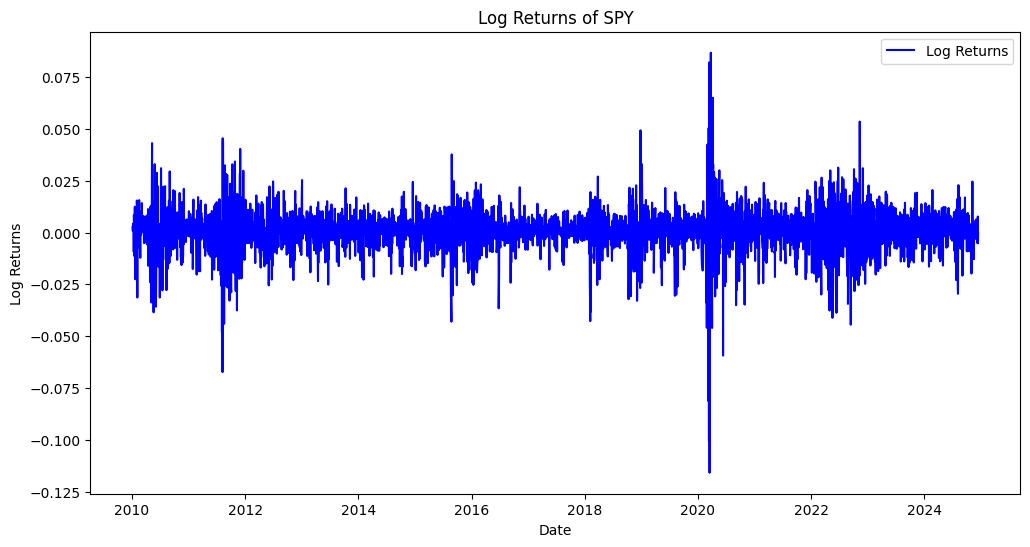

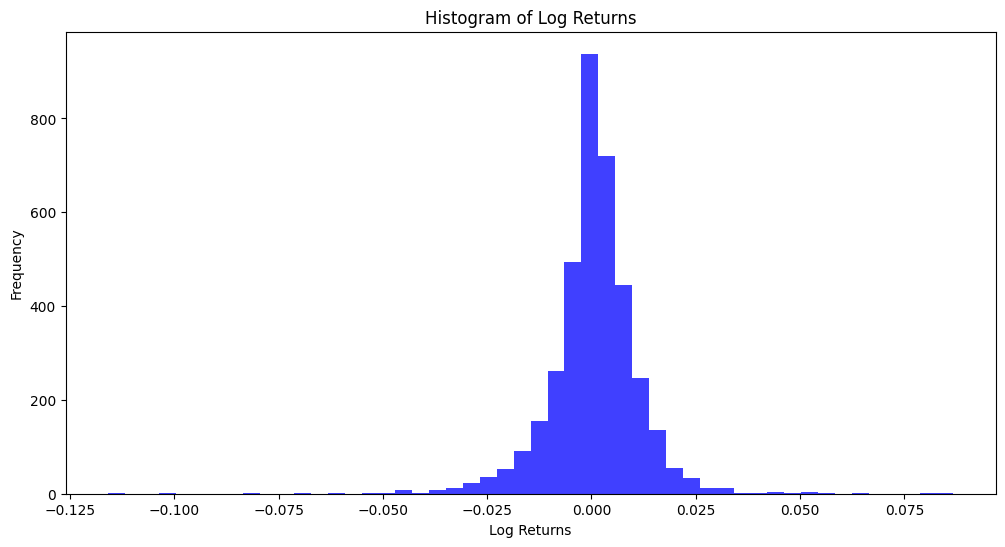

In [24]:

# Fetch SPY data
data = yf.download('SPY', start='2010-01-01', end='2024-12-31')
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data.dropna(inplace=True)

# Plot log returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Log_Returns'], label='Log Returns', color='blue')
plt.title('Log Returns of SPY')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Plot histogram of log returns
plt.figure(figsize=(12, 6))
plt.hist(data['Log_Returns'], bins=50, color='blue', alpha=0.75)
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

### Apply Garch Model and Evaluate the Model

In this section we will apply GARCH(1,1), EGARCH and GJR-GARCH

In [29]:
# Rescale log returns
data['Scaled_Log_Returns'] = data['Log_Returns'] * 100

# Original GARCH Model (GARCH(1,1))
garch_model = arch_model(data['Scaled_Log_Returns'], vol='Garch', p=1, q=1, mean='AR', lags=1, dist='t')
garch_fit = garch_model.fit(disp='off')
print("GARCH(1,1) Model Summary:")
print(f"AIC: {garch_fit.aic}, BIC: {garch_fit.bic}")

# EGARCH Model
egarch_model = arch_model(data['Scaled_Log_Returns'], vol='EGarch', p=1, q=1, mean='AR', lags=1, dist='t')
egarch_fit = egarch_model.fit(disp='off')
print("\nEGARCH(1,1) Model Summary:")
print(f"AIC: {egarch_fit.aic}, BIC: {egarch_fit.bic}")

# GJR-GARCH Model
gjr_model = arch_model(data['Scaled_Log_Returns'], vol='Garch', p=1, q=1, o=1, mean='AR', lags=1, dist='t')
gjr_fit = gjr_model.fit(disp='off')
print("\nGJR-GARCH(1,1) Model Summary:")
print(f"AIC: {gjr_fit.aic}, BIC: {gjr_fit.bic}")

# Calculate realized volatility (rolling standard deviation) using scaled returns
rolling_window = 30  # window size for realized volatility
data['Realized_Volatility'] = data['Scaled_Log_Returns'].rolling(window=rolling_window).std() * np.sqrt(252)

# # Plot realized volatility
# plt.figure(figsize=(12, 6))
# plt.plot(data.index[-100:], data['Realized_Volatility'][-100:], label='Realized Volatility', color='blue')
# plt.title('Realized Volatility (Scaled Data)')
# plt.xlabel('Date')
# plt.ylabel('Volatility')
# plt.legend()
# plt.show()

# Summarize model fits
print("\nGARCH Model Summary:")
print(garch_fit.summary())

print("\nEGARCH Model Summary:")
print(egarch_fit.summary())

print("\nGJR-GARCH Model Summary:")
print(gjr_fit.summary())


GARCH(1,1) Model Summary:
AIC: 9390.835136636233, BIC: 9428.229777587056

EGARCH(1,1) Model Summary:
AIC: 9402.085433848582, BIC: 9439.480074799405

GJR-GARCH(1,1) Model Summary:
AIC: 9258.581778449243, BIC: 9302.208859558536

GARCH Model Summary:
                              AR - GARCH Model Results                              
Dep. Variable:           Scaled_Log_Returns   R-squared:                       0.004
Mean Model:                              AR   Adj. R-squared:                  0.004
Vol Model:                            GARCH   Log-Likelihood:               -4689.42
Distribution:      Standardized Student's t   AIC:                           9390.84
Method:                  Maximum Likelihood   BIC:                           9428.23
                                              No. Observations:                 3761
Date:                      Sat, Dec 14 2024   Df Residuals:                     3759
Time:                              18:30:23   Df Model:                 

### Use GARCH to Simulated Different Volatility Paths 

The volatility (vol) is computed iteratively for n_days using the GARCH(1,1) formula: $$\sigma_t^2 = \omega + \alpha \cdot \epsilon_{t-1}^2 + \beta \cdot \sigma_{t-1}^2$$

Where:

- $\sigma_t^2$: Conditional variance (volatility squared) at time $t$
- $\epsilon_t$: Residual (shock) at time $t$
- $\omega$: Long-run average variance (constant term).
- $\alpha$: Coefficient that determines the sensitivity to past shocks ($\epsilon_{t-1}^2$)
- $\beta$: Coefficient that determines the persistence of past volatility ($\sigma_{t-1}^2$) 

The initial volatility vol[0] is calculated as the unconditional variance of the GARCH(1,1) process:
$$\sigma^2 = \frac{\omega}{1-\alpha - \beta}$$


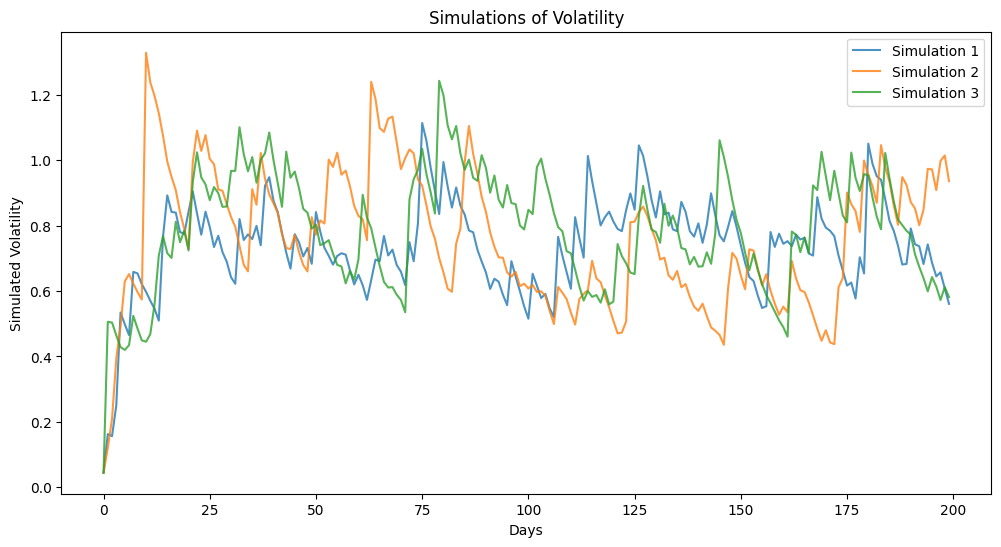

In [31]:
# Parameters for the simulation
np.random.seed(42)  # for reproducibility
n_simulations = 3  # reduce the number of simulated paths
n_days = 200  # number of days in each simulation

# Define the GARCH(1,1) model with specific parameters
omega = 0.0001
alpha = 0.1
beta = 0.85

# Simulating multiple GARCH(1,1) paths
simulated_volatility = []
for i in range(n_simulations):
    # Initialize volatility and residuals
    vol = np.zeros(n_days)
    resid = np.random.normal(0, 1, n_days)  # standard normal shocks
    vol[0] = np.sqrt(omega / (1 - alpha - beta))  # Starting point for volatility

    # Simulate the volatility process
    for t in range(1, n_days):
        vol[t] = np.sqrt(omega + alpha * resid[t-1]**2 + beta * vol[t-1]**2)
    
    simulated_volatility.append(vol)

# Convert to numpy array for easier plotting
simulated_volatility = np.array(simulated_volatility)

# Plot the simulated volatilities
plt.figure(figsize=(12, 6))
for i in range(simulated_volatility.shape[0]):  # plot each simulation
    plt.plot(simulated_volatility[i, :], alpha=0.8, lw=1.5, label=f'Simulation {i+1}')

plt.title('Simulations of Volatility')
plt.xlabel('Days')
plt.ylabel('Simulated Volatility')
plt.legend()
plt.show()
